In [1]:
#libraries required to make model
import tensorflow as tf   
from tensorflow import keras
import PIL

In [2]:
physical_device=tf.config.experimental.list_physical_devices('GPU')
print("No. of GPUs Available: ",len(physical_device))
tf.config.experimental.set_memory_growth(physical_device[0],True)

No. of GPUs Available:  1


In [3]:
import numpy as np
import sys
import PIL
#CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,Dropout,MaxPool2D,Conv2D,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
#save model
from tensorflow.keras.models import load_model
#image preprocessing
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
#dividing data into train and validation
import os.path
import random as rnd
import glob
import shutil
#face detection test
import cv2

In [12]:
import matplotlib.pyplot as plt               # for visualization
%matplotlib inline

In [28]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [8]:
print("There are ", len(x_train), "images in the training dataset")     

There are  50000 images in the training dataset


In [10]:
x_train[0].shape

(32, 32, 3)

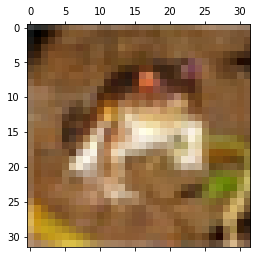

In [13]:
plt.matshow(x_train[0])

In [15]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [17]:
#Normalization
x_train = x_train / 255

In [18]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [19]:
x_train.shape

(50000, 32, 32, 3)

In [20]:
x_train_flt = x_train.reshape(len(x_train), 32*32*3)

In [21]:
x_train_flt.shape

(50000, 3072)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(3072,), activation='relu'),
    tf.keras.layers.Dense(100, input_shape=(100,),activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 318,410
Trainable params: 318,410
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(x_train_flt,y_train, batch_size= 64,epochs=30,verbose=2,validation_split=0.2)

Epoch 1/30


ValueError: in user code:

    C:\Users\Predator\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Predator\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Predator\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Predator\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Predator\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Predator\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Predator\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\Predator\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\Users\Predator\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:196 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_5 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [64, 3072]


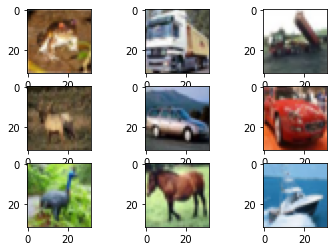

In [30]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = x_train[i]
    plt.imshow(img)
    
# show the plot
plt.show()

In [31]:
# fix random seed for reproducibility
seed = 6
np.random.seed(seed) 

In [34]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [51]:
x_train.shape

(50000, 32, 32, 3)

In [35]:
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [37]:
from keras.utils import np_utils

In [38]:
# hot encode outputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

print(Y_train.shape)
print(Y_train[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [60]:
from keras.layers import GlobalAveragePooling2D
from keras.optimizers import SGD

In [100]:
# start building the model - import necessary layers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

def allcnn(weights=None):
    # define model type - Sequential
    model = Sequential()

    # add model layers - Convolution2D, Activation, Dropout
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    # load the weights
    if weights:
        model.load_weights(weights)
    
    # return model
    return model

In [101]:
x_train.shape

(50000, 32, 32, 3)

In [102]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# build model 
model = allcnn()

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_117 (Conv2D)          (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_85 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_86 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_26 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 16, 16, 192)     

In [103]:
# define additional training parameters
epochs = 350
batch_size = 32

# fit the model
model.fit(x_train, Y_train, validation_data=(x_test, Y_test), epochs=epochs, batch_size=batch_size, verbose = 1)

Epoch 1/350
1563/1563 [==============================] - 38s 24ms/step - loss: 1.9997 - accuracy: 0.2363 - val_loss: 1.6522 - val_accuracy: 0.3768
Epoch 2/350
1563/1563 [==============================] - 37s 24ms/step - loss: 1.5217 - accuracy: 0.4362 - val_loss: 1.3450 - val_accuracy: 0.5005
Epoch 3/350
1563/1563 [==============================] - 38s 24ms/step - loss: 1.2396 - accuracy: 0.5512 - val_loss: 1.0845 - val_accuracy: 0.6110
Epoch 4/350
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0519 - accuracy: 0.6235 - val_loss: 0.9641 - val_accuracy: 0.6572
Epoch 5/350
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9293 - accuracy: 0.6697 - val_loss: 0.8647 - val_accuracy: 0.6972
Epoch 6/350
1563/1563 [==============================] - 38s 25ms/step - loss: 0.8241 - accuracy: 0.7092 - val_loss: 0.8092 - val_accuracy: 0.7177
Epoch 7/350
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7377 - accuracy: 0.7402 - val_loss: 0

1563/1563 [==============================] - 37s 24ms/step - loss: 0.1956 - accuracy: 0.9342 - val_loss: 0.8603 - val_accuracy: 0.8134
Epoch 57/350
1563/1563 [==============================] - 37s 24ms/step - loss: 0.1934 - accuracy: 0.9342 - val_loss: 0.8286 - val_accuracy: 0.8221
Epoch 58/350
1563/1563 [==============================] - 37s 24ms/step - loss: 0.1883 - accuracy: 0.9361 - val_loss: 0.8854 - val_accuracy: 0.8202
Epoch 59/350
1563/1563 [==============================] - 37s 24ms/step - loss: 0.1942 - accuracy: 0.9342 - val_loss: 0.8468 - val_accuracy: 0.8145
Epoch 60/350
1563/1563 [==============================] - 37s 24ms/step - loss: 0.1842 - accuracy: 0.9367 - val_loss: 0.8868 - val_accuracy: 0.8147
Epoch 61/350
1563/1563 [==============================] - 37s 24ms/step - loss: 0.1959 - accuracy: 0.9341 - val_loss: 0.7751 - val_accuracy: 0.8283
Epoch 62/350
1563/1563 [==============================] - 37s 24ms/step - loss: 0.1899 - accuracy: 0.9349 - val_loss: 0.8889 

1563/1563 [==============================] - 37s 24ms/step - loss: 0.1755 - accuracy: 0.9410 - val_loss: 0.9972 - val_accuracy: 0.8317
Epoch 112/350
1563/1563 [==============================] - 37s 24ms/step - loss: 0.1822 - accuracy: 0.9403 - val_loss: 1.1228 - val_accuracy: 0.8273
Epoch 113/350
1563/1563 [==============================] - 37s 24ms/step - loss: 0.1759 - accuracy: 0.9425 - val_loss: 1.0365 - val_accuracy: 0.8336
Epoch 114/350
1563/1563 [==============================] - 37s 24ms/step - loss: 0.1802 - accuracy: 0.9426 - val_loss: 1.0702 - val_accuracy: 0.8287
Epoch 115/350
1563/1563 [==============================] - 37s 24ms/step - loss: 0.1727 - accuracy: 0.9441 - val_loss: 1.1165 - val_accuracy: 0.8296
Epoch 116/350
1563/1563 [==============================] - 39s 25ms/step - loss: 0.1716 - accuracy: 0.9442 - val_loss: 1.0659 - val_accuracy: 0.8114
Epoch 117/350
1563/1563 [==============================] - 37s 24ms/step - loss: 0.1748 - accuracy: 0.9432 - val_loss: 1

KeyboardInterrupt: 

In [144]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [107]:
import pandas as pd
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")

In [110]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,98,105,108,92,101,106,91,101,107,93,...,171,183,182,176,175,175,168,181,181,175
1,101,108,101,101,108,101,102,109,102,103,...,103,100,109,104,100,109,103,100,109,102
2,85,115,27,63,90,25,37,66,15,69,...,141,172,193,136,173,192,138,179,192,149
3,213,213,214,215,214,218,220,218,226,223,...,216,193,194,209,201,204,216,203,201,237
4,41,74,144,41,75,139,41,75,139,41,...,133,41,77,130,44,75,133,42,73,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,156,186,205,153,183,201,153,183,201,152,...,90,40,73,92,49,79,99,46,77,97
1996,68,101,169,69,103,173,70,104,176,71,...,58,61,73,64,51,62,53,49,61,52
1997,216,190,168,219,193,169,214,189,163,188,...,135,182,167,150,184,170,152,188,171,151
1998,46,24,17,43,32,11,77,82,60,117,...,147,102,134,146,100,131,145,99,130,148


In [142]:
test_data['1']

0       105.0
1       108.0
2       115.0
3       213.0
4        74.0
        ...  
1995    186.0
1996    101.0
1997    190.0
1998     24.0
1999     74.0
Name: 1, Length: 2000, dtype: float32

In [111]:
test_data=test_data.astype('float32')

In [130]:
from numpy import genfromtxt
my_data = genfromtxt('https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv', delimiter=',',skip_header=1)

In [131]:
my_data=my_data.astype('float32')

In [132]:
my_data[0]

array([ 98., 105., 108., ..., 181., 181., 175.], dtype=float32)

In [133]:
my_data=my_data/255

In [134]:
my_data[0]

array([0.38431373, 0.4117647 , 0.42352942, ..., 0.70980394, 0.70980394,
       0.6862745 ], dtype=float32)

In [135]:
my_data.shape

(2000, 3072)

In [145]:
my_data=my_data.reshape(2000,32,32,3)

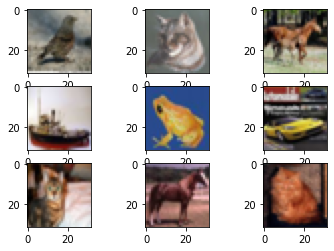

In [159]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = my_data[i]
    plt.imshow(img)
    
# show the plot
plt.show()

In [146]:
predictions_1 = model.predict(x=my_data, verbose=0)

In [148]:
p=np.round(predictions_1)

In [149]:
pi=[]
for i in range(len(p)):
    pi.append(np.argmax(p[i]))

In [150]:
pi

[2,
 5,
 7,
 8,
 6,
 1,
 3,
 7,
 3,
 5,
 8,
 1,
 4,
 1,
 3,
 7,
 0,
 0,
 7,
 6,
 2,
 9,
 4,
 8,
 4,
 0,
 8,
 7,
 0,
 7,
 7,
 3,
 2,
 4,
 2,
 0,
 6,
 4,
 4,
 4,
 7,
 2,
 2,
 1,
 4,
 5,
 3,
 2,
 4,
 4,
 3,
 8,
 7,
 5,
 8,
 1,
 1,
 5,
 1,
 0,
 7,
 1,
 7,
 6,
 1,
 1,
 9,
 8,
 2,
 1,
 6,
 6,
 9,
 6,
 2,
 0,
 2,
 4,
 4,
 8,
 4,
 3,
 8,
 9,
 1,
 4,
 3,
 6,
 3,
 4,
 5,
 8,
 9,
 8,
 1,
 0,
 0,
 7,
 1,
 6,
 8,
 5,
 2,
 8,
 4,
 9,
 4,
 8,
 5,
 0,
 8,
 0,
 0,
 0,
 1,
 7,
 6,
 5,
 0,
 2,
 1,
 6,
 1,
 0,
 6,
 3,
 7,
 0,
 1,
 8,
 4,
 3,
 0,
 0,
 0,
 7,
 9,
 0,
 9,
 6,
 7,
 7,
 5,
 4,
 4,
 6,
 4,
 8,
 2,
 8,
 2,
 4,
 2,
 8,
 5,
 5,
 5,
 5,
 2,
 4,
 5,
 2,
 9,
 8,
 7,
 5,
 6,
 1,
 8,
 1,
 2,
 5,
 9,
 2,
 1,
 6,
 0,
 2,
 5,
 7,
 2,
 7,
 2,
 0,
 2,
 6,
 4,
 7,
 4,
 3,
 6,
 8,
 0,
 5,
 0,
 0,
 4,
 6,
 8,
 1,
 1,
 5,
 2,
 5,
 8,
 0,
 1,
 0,
 0,
 3,
 2,
 8,
 1,
 5,
 6,
 8,
 2,
 7,
 1,
 3,
 3,
 4,
 4,
 7,
 5,
 7,
 3,
 0,
 3,
 7,
 7,
 6,
 4,
 1,
 9,
 8,
 8,
 8,
 0,
 7,
 1,
 0,
 0,
 5,
 2,
 4,
 3,
 2,
 6,
 1,


In [151]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [153]:
res = pd.DataFrame(pi) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]
res.to_csv("prediction_CNN_results.csv") 

In [161]:
model.fit(x_test, Y_test, validation_data=(x_train, Y_train), epochs=40, batch_size=batch_size, verbose = 1)

Epoch 1/40
313/313 [==============================] - 9s 30ms/step - loss: 0.3300 - accuracy: 0.8838 - val_loss: 0.1352 - val_accuracy: 0.9503
Epoch 2/40
313/313 [==============================] - 10s 32ms/step - loss: 0.3246 - accuracy: 0.8885 - val_loss: 0.1422 - val_accuracy: 0.9488
Epoch 3/40
313/313 [==============================] - 10s 32ms/step - loss: 0.3061 - accuracy: 0.8921 - val_loss: 0.1302 - val_accuracy: 0.9536
Epoch 4/40
313/313 [==============================] - 9s 30ms/step - loss: 0.2930 - accuracy: 0.9008 - val_loss: 0.0923 - val_accuracy: 0.9678
Epoch 5/40
313/313 [==============================] - 9s 30ms/step - loss: 0.2547 - accuracy: 0.9113 - val_loss: 0.0825 - val_accuracy: 0.9698
Epoch 6/40
313/313 [==============================] - 9s 30ms/step - loss: 0.2551 - accuracy: 0.9132 - val_loss: 0.0706 - val_accuracy: 0.9743
Epoch 7/40
313/313 [==============================] - 9s 30ms/step - loss: 0.2423 - accuracy: 0.9158 - val_loss: 0.0708 - val_accuracy: 0.97

In [162]:
predictions_2 = model.predict(x=my_data, verbose=0)

In [163]:
p=np.round(predictions_2)

In [164]:
pi=[]
for i in range(len(p)):
    pi.append(np.argmax(p[i]))

In [165]:
res = pd.DataFrame(pi) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]
res.to_csv("prediction_CNN_results2.csv") 

In [179]:
model2 = allcnn()

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [180]:
# define additional training parameters
epochs = 45
batch_size = 32

# fit the model
model2.fit(x_test, Y_test, epochs=epochs, batch_size=batch_size, verbose = 1)

Epoch 1/45
313/313 [==============================] - 7s 22ms/step - loss: 2.2254 - accuracy: 0.1533
Epoch 2/45
313/313 [==============================] - 7s 22ms/step - loss: 2.0536 - accuracy: 0.2178
Epoch 3/45
313/313 [==============================] - 7s 22ms/step - loss: 1.9131 - accuracy: 0.2771
Epoch 4/45
313/313 [==============================] - 7s 22ms/step - loss: 1.7896 - accuracy: 0.3246
Epoch 5/45
313/313 [==============================] - 7s 22ms/step - loss: 1.6804 - accuracy: 0.3648
Epoch 6/45
313/313 [==============================] - 7s 22ms/step - loss: 1.5892 - accuracy: 0.4007
Epoch 7/45
313/313 [==============================] - 7s 22ms/step - loss: 1.5149 - accuracy: 0.4423
Epoch 8/45
313/313 [==============================] - 7s 22ms/step - loss: 1.4360 - accuracy: 0.4698
Epoch 9/45
313/313 [==============================] - 7s 22ms/step - loss: 1.3726 - accuracy: 0.4982
Epoch 10/45
313/313 [==============================] - 7s 22ms/step - loss: 1.3103 - accura

In [181]:
predictions_3 = model2.predict(x=my_data, verbose=0)
p=np.round(predictions_3)

In [182]:
pi=[]
for i in range(len(p)):
    pi.append(np.argmax(p[i]))

In [183]:
res = pd.DataFrame(pi) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]
res.to_csv("prediction_CNN_results4.csv") 